In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df_app_train = pd.read_csv('./data/application_train.csv')
df_app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_app_train.shape

(307511, 122)

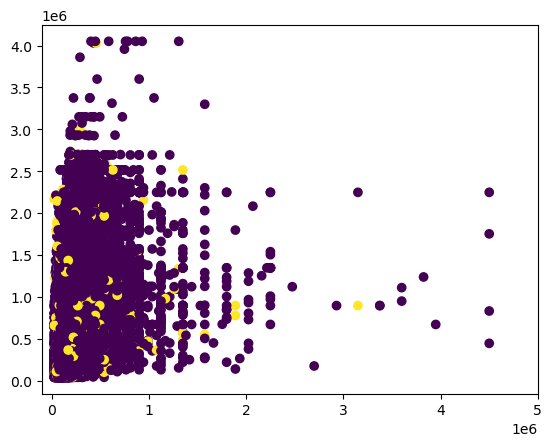

In [24]:
plt.scatter(x=df_app_train['AMT_INCOME_TOTAL'], y=df_app_train['AMT_CREDIT'], c=df_app_train['TARGET'])
plt.xlim(-100000, 5000000)
plt.show()

In [17]:
pd.crosstab(df_app_train["TARGET"], df_app_train["CODE_GENDER"], margins=True, normalize="columns")

CODE_GENDER,F,M,XNA,All
TARGET,,,,
0,0.930007,0.898581,1.0,0.919271
1,0.069993,0.101419,0.0,0.080729


In [18]:
pd.crosstab(df_app_train["TARGET"], df_app_train["FLAG_OWN_CAR"], margins=True, normalize="columns")

FLAG_OWN_CAR,N,Y,All
TARGET,,,
0,0.914998,0.927563,0.919271
1,0.085002,0.072437,0.080729


In [19]:
pd.crosstab(df_app_train["TARGET"], df_app_train["FLAG_OWN_REALTY"], margins=True, normalize="columns")

FLAG_OWN_REALTY,N,Y,All
TARGET,,,
0,0.916751,0.920384,0.919271
1,0.083249,0.079616,0.080729


In [48]:
conditions = [
    (df_app_train["FLAG_OWN_REALTY"] == 'Y') & (df_app_train["FLAG_OWN_CAR"] == 'Y'),
    (df_app_train["FLAG_OWN_REALTY"] == 'Y'),
    (df_app_train["FLAG_OWN_CAR"] == 'Y')
]
choices = [
    "BOTH",
    "REALTY",
    "CAR"
]

realty_and_car = np.select(conditions, choices, default="NEITHER")
pd.crosstab(df_app_train["TARGET"], realty_and_car, margins=True, normalize='columns')

col_0,BOTH,CAR,NEITHER,REALTY,All
TARGET,,,,,
0,0.926672,0.929562,0.910088,0.917156,0.919271
1,0.073328,0.070438,0.089912,0.082844,0.080729


In [25]:
pd.crosstab(df_app_train["TARGET"], df_app_train["CNT_CHILDREN"], margins=True, normalize="columns")

CNT_CHILDREN,0,1,2,3,4,5,6,7,8,9,10,11,12,14,19,All
TARGET,,,,,,,,,,,,,,,,
0,0.922882,0.910764,0.912782,0.903686,0.871795,0.916667,0.714286,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.919271
1,0.077118,0.089236,0.087218,0.096314,0.128205,0.083333,0.285714,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.080729


<Axes: xlabel='DAYS_BIRTH'>

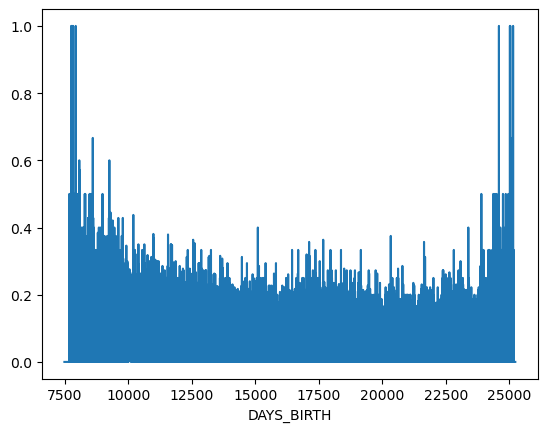

In [36]:
df_app_train["DAYS_BIRTH"] = abs(df_app_train["DAYS_BIRTH"])
age = df_app_train.groupby('DAYS_BIRTH')['TARGET'].agg('mean')
age.plot()

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  22.,
         62.,  71.,  68.,  73.,  71.,  80.,  74.,  64.,  58.,  49.,  55.,
         57.,  65.,  70.,  70.,  51.,  70.,  44.,  60.,  51.,  95., 120.,
        134., 140., 153., 135., 162., 166., 148., 136., 149., 150., 162.,
        161., 147., 140., 146., 161., 156., 137., 189., 241., 222., 211.,
        212., 185., 188., 210., 193., 215., 172., 196., 179., 199., 179.,
        199., 189., 213., 173., 181., 192., 192., 179., 165., 190., 171.,
        198., 168., 182., 167., 213., 196., 201., 162., 212., 198., 189.,
        181., 214., 179., 224., 198., 204., 222., 195., 189., 202., 197.,
        169., 215., 211., 216., 203., 232., 212., 205., 185., 200., 207.,
        211., 186., 213., 177., 187., 227., 229., 215., 231., 211., 221.,
        252., 237., 207., 247., 233., 220., 223., 215., 241., 232., 193.,
        224., 261., 382., 407., 428., 385., 364., 411., 400., 418., 457.,
        406., 448., 422., 433., 457., 

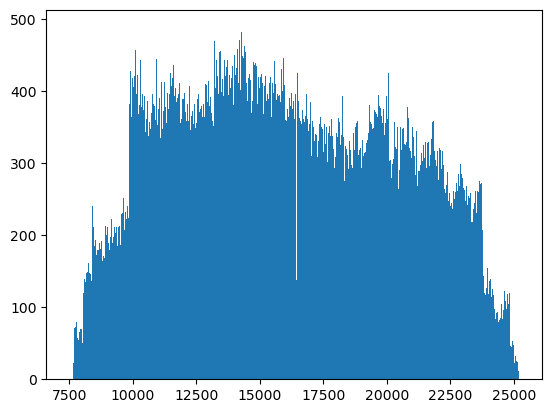

In [38]:
plt.hist(df_app_train["DAYS_BIRTH"], bins=1000)